# Digit Classification
## Importing important libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Loading datasets
#### these datasets are are loaded from keras module of dataset

In [3]:
(xtrain,ytrain),(xtest,ytest)=l=keras.datasets.mnist.load_data()

In [4]:
# shape of a single dataset
xtrain[0].shape

(28, 28)

### Normalizing the dataset

In [5]:
X1=xtrain/255
X2=xtest/255

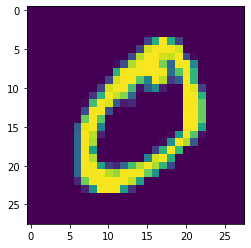

In [6]:
# image of a single dataset
plt.imshow(X1[1])

## Modelling the Neural Network with keras
#### In this we first use 3 layered neural network-
###### 1)layer 1- this function ("keras.layers.Fallten()") changes the give 2D dataset in 1D dataset or we cay say flattens the input.
###### 2)layer 2- in this layer we have 25 units of neuron on which data trains
###### layer 3- in this layer we use 10 neurons to have sparse categorical output(i.e output between(0-9) in the the give 10   
######   neurons where the neuron having the largest is considered as answer)


In [7]:
model=keras.Sequential({
    keras.layers.Flatten(),
    keras.layers.Dense(25,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
    
})

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
# here we use adam optimizer with default learning rate as it works expectedly
#and use 'sparse_categorical_croosentropy' as explained
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
#training the model with 20 epochs 
model.fit(X1,ytrain,epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
60000/60000 [==============================] - 10s 165us/sample - loss: 0.7393 - acc: 0.8500
Epoch 2/20
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2839 - acc: 0.9244
Epoch 3/20
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2277 - acc: 0.9364
Epoch 4/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1981 - acc: 0.9447
Epoch 5/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1778 - acc: 0.9495
Epoch 6/20
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1629 - acc: 0.9538
Epoch 7/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1508 - acc: 0.9574
Epoch 8/20
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1414 - acc: 0.9593
Epoch 9/20
60000/60000 [==============================] - 8s 133us/sample - loss:

In [10]:
#predicting the model
y_p=model.predict(X2)
y_p

array([[1.9371510e-06, 1.2218952e-06, 5.3644180e-06, ..., 3.4724414e-01,
        3.2782555e-06, 6.5863132e-06],
       [8.3148479e-06, 2.0229816e-04, 4.9860179e-02, ..., 0.0000000e+00,
        9.5367432e-07, 0.0000000e+00],
       [1.1920929e-07, 4.5792332e-01, 9.7590685e-04, ..., 3.0466914e-04,
        2.1263957e-04, 1.1801720e-05],
       ...,
       [5.9604645e-08, 0.0000000e+00, 3.5762787e-07, ..., 2.5480986e-04,
        3.6597252e-05, 1.1949539e-03],
       [5.9604645e-08, 2.0861626e-07, 0.0000000e+00, ..., 0.0000000e+00,
        3.1256676e-04, 8.9406967e-08],
       [1.1622906e-06, 9.8347664e-07, 4.2259693e-05, ..., 5.9604645e-08,
        1.1920929e-07, 0.0000000e+00]], dtype=float32)

### Converting the model output into an understandable manner

In [11]:
#looping to take max value from each single output
yp=[np.argmax(y_p[i]) for i in range(0,len(y_p))]
yp=np.array(yp,dtype='int')


In [12]:
print(ytest)
print(yp)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


### Accuracy and loss on test set

In [14]:
k=0
for i in range(0,1000):
    if(ytest[i]!=yp[i]):
        k+=1
print("loss on test set:",k/1000)
print("Accuracy on test set",1-(k/1000))

loss on test set: 0.038
Accuracy on test set 0.962


### Taking any random input

Predicting value of 666th(randomly taken) dataset : 7

Image of 666th data set:


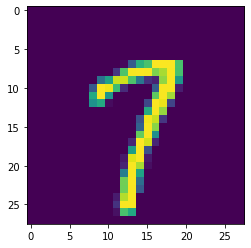

In [19]:
print("Predicting value of 666th(randomly taken) dataset :",ytest[666])
print("\nImage of 666th data set:")
plt.imshow(X2[666])